Dataset:
- The data is a subsampled version of the MNIST dataset
- It contains images for 10 digits (10 classes)
- The dataset contains 6,000 samples
- The images from the data set have the size 28 x 28.
- Every line of these files consists of an image, i.e. 785 numbers between 0 and 1.
- The first number of each line is the label, i.e. the digit which is depicted in the image.
- The following 784 numbers are the pixels of the 28 x 28 image.

Question 1:
Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data.

In [ ]:
# import libraries
import numpy as np

# class to implement PCA
class PCA:
    def __init__(self, n_components=None):
        self.n_components = n_components # number of principal components
        self.components = None # stores the principal components
        self.mean = None # stores the mean of each feature

    # function to fit the data
    def fit(self, X):
        # mean Centering
        self.mean = np.mean(X, axis=0) # calculate the mean of each feature

        # mean centering
        X_centered = X - self.mean # subtract the mean from the data points

        # calculate the covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # eigen decomposition of the covariance matrix
        eigenval, eigenvec = np.linalg.eigh(cov)

        # sort the eigenvalues in descending order
        idx = np.argsort(eigenval)[::-1]
        eigenval = eigenval[idx] # reorder eigenvalues
        eigenvec = eigenvec[:, idx] # reorder eigenvectors

        # select principal components
        if self.n_components is not None:
            self.components = eigenvec[:, :self.n_components] # select top k eigenvectors
        else:
            self.components = eigenvec # use all if n_components unspecified

    # function to transform the data
    def transform(self, X):
        # mean centering
        X_centered = X - self.mean # subtract the mean from the data points
        # project the data onto the principal components
        if self.components is not None:
            return np.dot(X_centered, self.components)
        else:
            raise ValueError("Usage: pca.fit(X) before pca.transform(X)")

In [ ]:
# load dataset
import pandas as pd
mnist = pd.read_csv(r'path\mnist.csv', header=None)

In [ ]:
# split dataset into labels and pixels
labels = mnist.iloc[:, 0].values
pixels = mnist.iloc[:, 1:].values

In [ ]:
# perform PCA
mypca = PCA(n_components=10)
mypca.fit(pixels)
reduced_pixels = mypca.transform(pixels)

In [ ]:
# show the covariance matrix of the reduced data
cov = np.cov(reduced_pixels, rowvar=False)
print(cov)

Question 2:
Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here.

In [ ]:
# import libraries
import numpy as np

# class to implement k-means clustering functionalities
class kmeans:
    # initialise the class with default values
    def __init__(self, n_clusters=10, max_iters=300, random_state=None):
        self.n_clusters = n_clusters # number of clusters
        self.max_iters = max_iters # maximum number of iterations for the algorithm
        self.random_state = random_state # seed for random initialisation of centroids

    # function to fit the data
    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # initialise centroids randomly from data points
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # update centroids based on mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # check for convergence
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = self.centroids

    # function to assign data points to the nearest centroid
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1) # array of cluster labels for each data point
    
    # function to update centroids based on mean of assigned data points
    def _update_centroids(self, X, labels):
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

In [ ]:
# load dataset
import pandas as pd
mnist = pd.read_csv(r'path\mnist.csv', header=None)

In [ ]:
# split dataset into labels and pixels
labels = mnist.iloc[:, 0].values
pixels = mnist.iloc[:, 1:].values

In [ ]:
# perform k-means clustering on the pixels
kmeans_model = kmeans(n_clusters=10, random_state=0)
kmeans_model.fit(pixels)

In [ ]:
# show cluster labels
cluster_labels = kmeans_model.labels_
print(cluster_labels)

Question 3:
Please plot the loss curve, that is, the change of loss value of the k-means algorithm with respect to the number of iterations

In [6]:
# import libraries
import numpy as np

# class to implement k-means clustering functionalities
class kmeans:
    # initialise the class with default values
    def __init__(self, n_clusters=10, max_iters=300, random_state=None):
        self.n_clusters = n_clusters # number of clusters
        self.max_iters = max_iters # maximum number of iterations for the algorithm
        self.random_state = random_state # seed for random initialisation of centroids
        self.loss_curve = [] # stores the loss values for each iteration

    # function to fit the data
    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # initialise centroids randomly from data points
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # update centroids based on mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # calculate the inertia (loss) and append to the loss curve
            inertia = self._calculate_inertia(X, labels)
            self.loss_curve.append(inertia)

            # check for convergence
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = self.centroids

    # function to assign data points to the nearest centroid
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1) # array of cluster labels for each data point
    
    # function to update centroids based on mean of assigned data points
    def _update_centroids(self, X, labels):
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids
    
    # add function to calculate the inertia
    def _calculate_inertia(self, X, labels):
        inertia = 0.0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            squared_distances = np.sum((cluster_points - centroid) ** 2)
            inertia += squared_distances
        return inertia

In [ ]:
# load dataset
import pandas as pd
mnist = pd.read_csv(r'path\mnist.csv', header=None)

In [8]:
# split dataset into labels and pixels
labels = mnist.iloc[:, 0].values
pixels = mnist.iloc[:, 1:].values

In [9]:
# perform k-means clustering on the pixels
kmeans_model = kmeans(n_clusters=10, max_iters=10, random_state=0)
kmeans_model.fit(pixels)

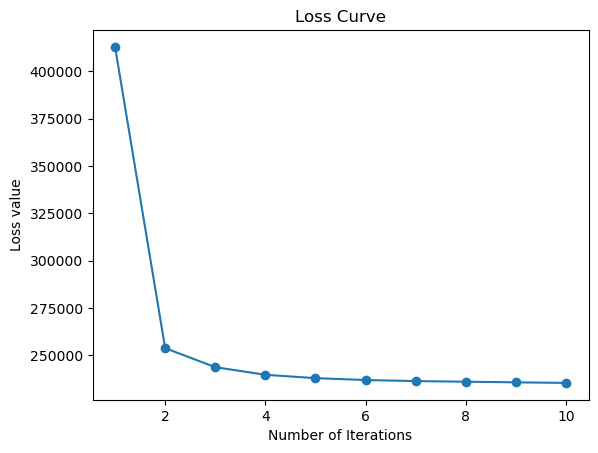

In [10]:
# plot the loss curve
import matplotlib.pyplot as plt
plt.plot(range(1, len(kmeans_model.loss_curve) + 1), kmeans_model.loss_curve, marker='o')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss value')
plt.title('Loss Curve')
plt.show()

Question 4:
Please use the first 4000 samples as the training set and remaining 2000 samples as the validation set, and design a way to choose the best k in k-means algorithm.

In [11]:
# import libraries
import numpy as np

# class to implement k-means clustering functionalities
class kmeans:
    # initialise the class with default values
    def __init__(self, n_clusters=10, max_iters=300, random_state=None):
        self.n_clusters = n_clusters # number of clusters
        self.max_iters = max_iters # maximum number of iterations for the algorithm
        self.random_state = random_state # seed for random initialisation of centroids
        self.loss_curve = [] # stores the loss values for each iteration

    # function to fit the data
    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # initialise centroids randomly from data points
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # assign each data point to the nearest centroid
            labels = self._assign_clusters(X)

            # update centroids based on mean of assigned data points
            new_centroids = self._update_centroids(X, labels)

            # calculate the inertia (loss) and append to the loss curve
            inertia = self._calculate_inertia(X, labels)
            self.loss_curve.append(inertia)

            # check for convergence
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

        self.labels_ = labels
        self.cluster_centers_ = self.centroids

    # function to assign data points to the nearest centroid
    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1) # array of cluster labels for each data point
    
    # function to update centroids based on mean of assigned data points
    def _update_centroids(self, X, labels):
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids
    
    # add function to calculate the inertia
    def _calculate_inertia(self, X, labels):
        inertia = 0.0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            squared_distances = np.sum((cluster_points - centroid) ** 2)
            inertia += squared_distances
        return inertia

In [ ]:
# load dataset
import pandas as pd
mnist = pd.read_csv(r'path\mnist.csv', header=None)

In [13]:
# split dataset into labels and pixels
labels = mnist.iloc[:, 0].values
pixels = mnist.iloc[:, 1:].values

In [14]:
# split pixels into training (first 4000 samples) and validation (remaining 2000 samples) sets
train_pixels = pixels[:4000]
val_pixels = pixels[4000:]

In [15]:
# perform k-means clustering on the training set
kmeans_model = kmeans(n_clusters=10, max_iters=10, random_state=0)
kmeans_model.fit(train_pixels)

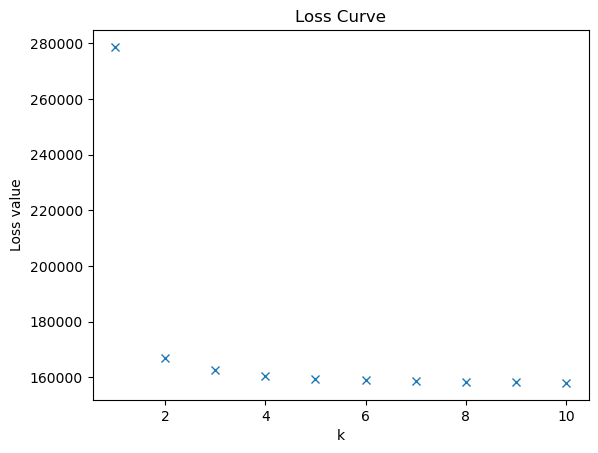

In [16]:
# plot the loss curve
import matplotlib.pyplot as plt
plt.plot(range(1, len(kmeans_model.loss_curve) + 1), kmeans_model.loss_curve, marker='x', linestyle='')
plt.xlabel('k')
plt.ylabel('Loss value')
plt.title('Loss Curve')
plt.show()

In [17]:
# based on this plot, choose the candidate values of k
candidate_values = [5, 6, 7, 8, 9, 10]

# initialise variables to keep track of the best K and smallest loss
best_k = None
lowest_loss = float('inf')

# dictionary to store loss curves for each K
loss_curves = {}

# perform k-means clustering on the validation set
for k in candidate_values:
    kmeans_model = kmeans(n_clusters=k, random_state=0)
    kmeans_model.fit(val_pixels)

    # store the loss curve for this K
    loss_curves[k] = kmeans_model.loss_curve
    
    # get the final loss value from the loss curve
    final_loss = kmeans_model.loss_curve[-1]
    
    # Check if this K value has a lower final loss
    if final_loss < lowest_loss:
        best_k = k
        lowest_loss = final_loss

# The best K value with the lowest final loss is stored in 'best_k'
print("Best K with Lowest Loss:", best_k)

Best K with Lowest Loss: 10


Question 5: 
- implement kernel k-means algorithm with RBF-kernel
- only use the first 500 samples and cluster the them into 5 groups

In [1]:
# import libraries
import numpy as np

# class to implement k-means clustering functionalities
class kmeans:
    """
    modify the kmeans class to take the hyperparameter sigma
    """
    def __init__(self, n_clusters=10, max_iters=300, random_state=None, sigma=None):
        self.n_clusters = n_clusters # number of clusters
        self.max_iters = max_iters # maximum number of iterations for the algorithm
        self.random_state = random_state # seed for random initialisation of centroids
        self.loss_curve = [] # stores the loss values for each iteration
        self.sigma = sigma # hyperparameter for RBF kernel

    # function to fit the data
    def fit(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)

        # initialise centroids randomly from data points
        random_indices = np.random.choice(len(X), self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        """
        implement the RBF kernel
        """
        N = X.shape[0]
        if self.sigma is None:
            # calculate hyperparameter
            pairwise_distances = np.linalg.norm(X[:, np.newaxis] - X, axis=2) ** 2
            self.sigma = np.sqrt(1 / (N ** 2) * np.sum(pairwise_distances))

        # initialise cluster assignments randomly
        labels = np.random.randint(0, self.n_clusters, N)

        for _ in range(self.max_iters):

            # update centroids
            self.centroids = self._update_centroids(X, labels)

            """
            calculate the RBF kernel matrix
            """
            kernel_matrix = self._calculate_rbf_kernel(X, self.centroids)

            # assign each data point to the nearest cluster
            new_labels = np.argmax(kernel_matrix, axis=1)

            # calculate the inertia (loss) and append to the loss curve
            inertia = self._calculate_inertia(X, labels)
            self.loss_curve.append(inertia)

            # check for convergence
            if np.array_equal(labels, new_labels):
                break

            labels = new_labels

        self.labels_ = labels
        self.cluster_centers_ = self.centroids
    
    # function to update centroids based on mean of assigned data points
    def _update_centroids(self, X, labels):
        centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            centroids[i] = np.mean(X[labels == i], axis=0)
        return centroids
    
    # add function to calculate the inertia
    def _calculate_inertia(self, X, labels):
        inertia = 0.0
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            centroid = self.centroids[i]
            squared_distances = np.sum((cluster_points - centroid) ** 2)
            inertia += squared_distances
        return inertia

    """
    add function to calculate the RBF kernel matrix
    """
    def _calculate_rbf_kernel(self, X, centroids):
        # calculate pairwise squared distances
        pairwise_distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2) ** 2
        # calculate the RBF kernel using the squared distances and sigma
        return np.exp(-pairwise_distances / (2 * self.sigma ** 2))

In [ ]:
# load dataset
import pandas as pd
mnist = pd.read_csv(r'path\mnist.csv', header=None)

In [3]:
# using only the first 500 samples
labels = mnist.iloc[:500, 0].values
pixels = mnist.iloc[:500, 1:].values

In [5]:
# perform k-means clustering on the pixels
kmeans_model = kmeans(n_clusters=5, random_state=0)
kmeans_model.fit(pixels)

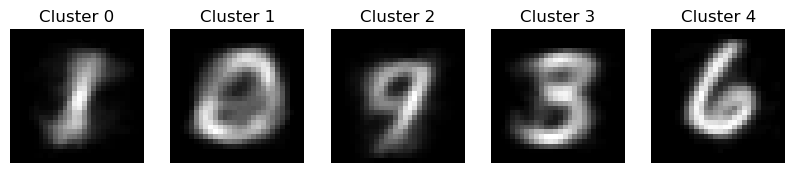

In [7]:
# plot the cluster centers (reshape to 28x28 for MNIST)
import matplotlib.pyplot as plt
cluster_centers = kmeans_model.cluster_centers_
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cluster_centers[i].reshape(28, 28), cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()